In [150]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [30]:
#data1 = '../Datasets/kidney_disease.csv'
data = pd.read_csv('kidney_disease.csv')
data.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [51]:
data.columns = ['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'glucosuria', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
data.head()

,id,age,blood_pressure,specific_gravity,albumin,glucosuria,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [32]:
data.shape

(400, 26)

In [33]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,glucosuria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   glucosuria               351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [54]:
# lets do separation of categorical and numerical variables.

cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object' ]


In [35]:
for col in cat_cols:
    print(f"{col} has {data[col].unique()}\n")

red_blood_cells has [nan 'normal' 'abnormal']

pus_cell has ['normal' 'abnormal' nan]

pus_cell_clumps has ['notpresent' 'present' nan]

bacteria has ['notpresent' 'present' nan]

packed_cell_volume has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']

white_blood_cell_count has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300

In [9]:
'''
WE have issues at:
1. packed_cell_volume
2. white_blood cell count
## Change to numeric

3. Diabetes_mellitus
4. Coronary_artery_disease
5. class
# change to binary.
'''

'\nWE have issues at:\n1. packed_cell_volume\n2. white_blood cell count\n## Change to numeric\n\n3. Diabetes_mellitus\n4. Coronary_artery_disease\n5. class\n# change to binary.\n'

In [52]:
#issue #1 &2 ---- We are changing the concerned columns to numerical --
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors ='coerce')
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors = 'coerce' )
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors = 'coerce')

In [53]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,glucosuria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,329.000000,294.000000,269.000000,400.000000
mean,199.500000,51.37250,76.700000,1.017300,1.010000,0.42250,150.627500,57.050500,3.058375,137.483750,4.584000,12.488250,38.884498,8406.122449,4.707435,0.375000
std,115.614301,17.21277,14.547821,0.005781,1.337675,1.05915,81.482066,49.796035,5.651688,9.841685,2.845899,2.925052,8.990105,2944.474190,1.025323,0.484729
min,0.000000,2.00000,50.000000,1.005000,0.000000,0.00000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000
25%,99.750000,42.00000,70.000000,1.010000,0.000000,0.00000,100.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,0.000000
50%,199.500000,54.50000,80.000000,1.020000,0.000000,0.00000,122.000000,42.000000,1.300000,138.000000,4.400000,12.600000,40.000000,8000.000000,4.800000,0.000000
75%,299.250000,64.25000,80.000000,1.020000,2.000000,0.00000,171.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,1.000000
max,399.000000,90.00000,180.000000,1.025000,5.000000,5.00000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


In [37]:
#issue # 3 - 5    ------- we are trying to make the concerned columns have only two options # binary
data['diabetes_mellitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)


data['coronary_artery_disease'] = data['coronary_artery_disease'].replace(to_replace='\tno', value='no')
data['class'] = data['class'].replace(to_replace={'ckd\t': 'ckd', 'notckd': 'not ckd'})
#data['diabetes_mellitus'] = data['diabetes_mellitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes', 'no':'no'}, inplace=True)

data['class'].replace({'ckd': 0, 'not ckd': 1}, inplace=True)
data['class'] = pd.to_numeric(data['class'], errors='coerce')

In [55]:
for col in cat_cols:
    print(f" {col} has {data[col].unique()}\n")

 red_blood_cells has ['normal' 'abnormal']

 pus_cell has ['normal' 'abnormal']

 pus_cell_clumps has ['notpresent' 'present' nan]

 bacteria has ['notpresent' 'present' nan]

 hypertension has ['yes' 'no' nan]

 diabetes_mellitus has ['yes' 'no' nan]

 coronary_artery_disease has ['no' 'yes']

 appetite has ['good' 'poor']

 peda_edema has ['no' 'yes']

 aanemia has ['no' 'yes']



C:\Users\USER\AppData\Local\Temp\ipykernel_6032\2154932400.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_6032\2154932400.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wi

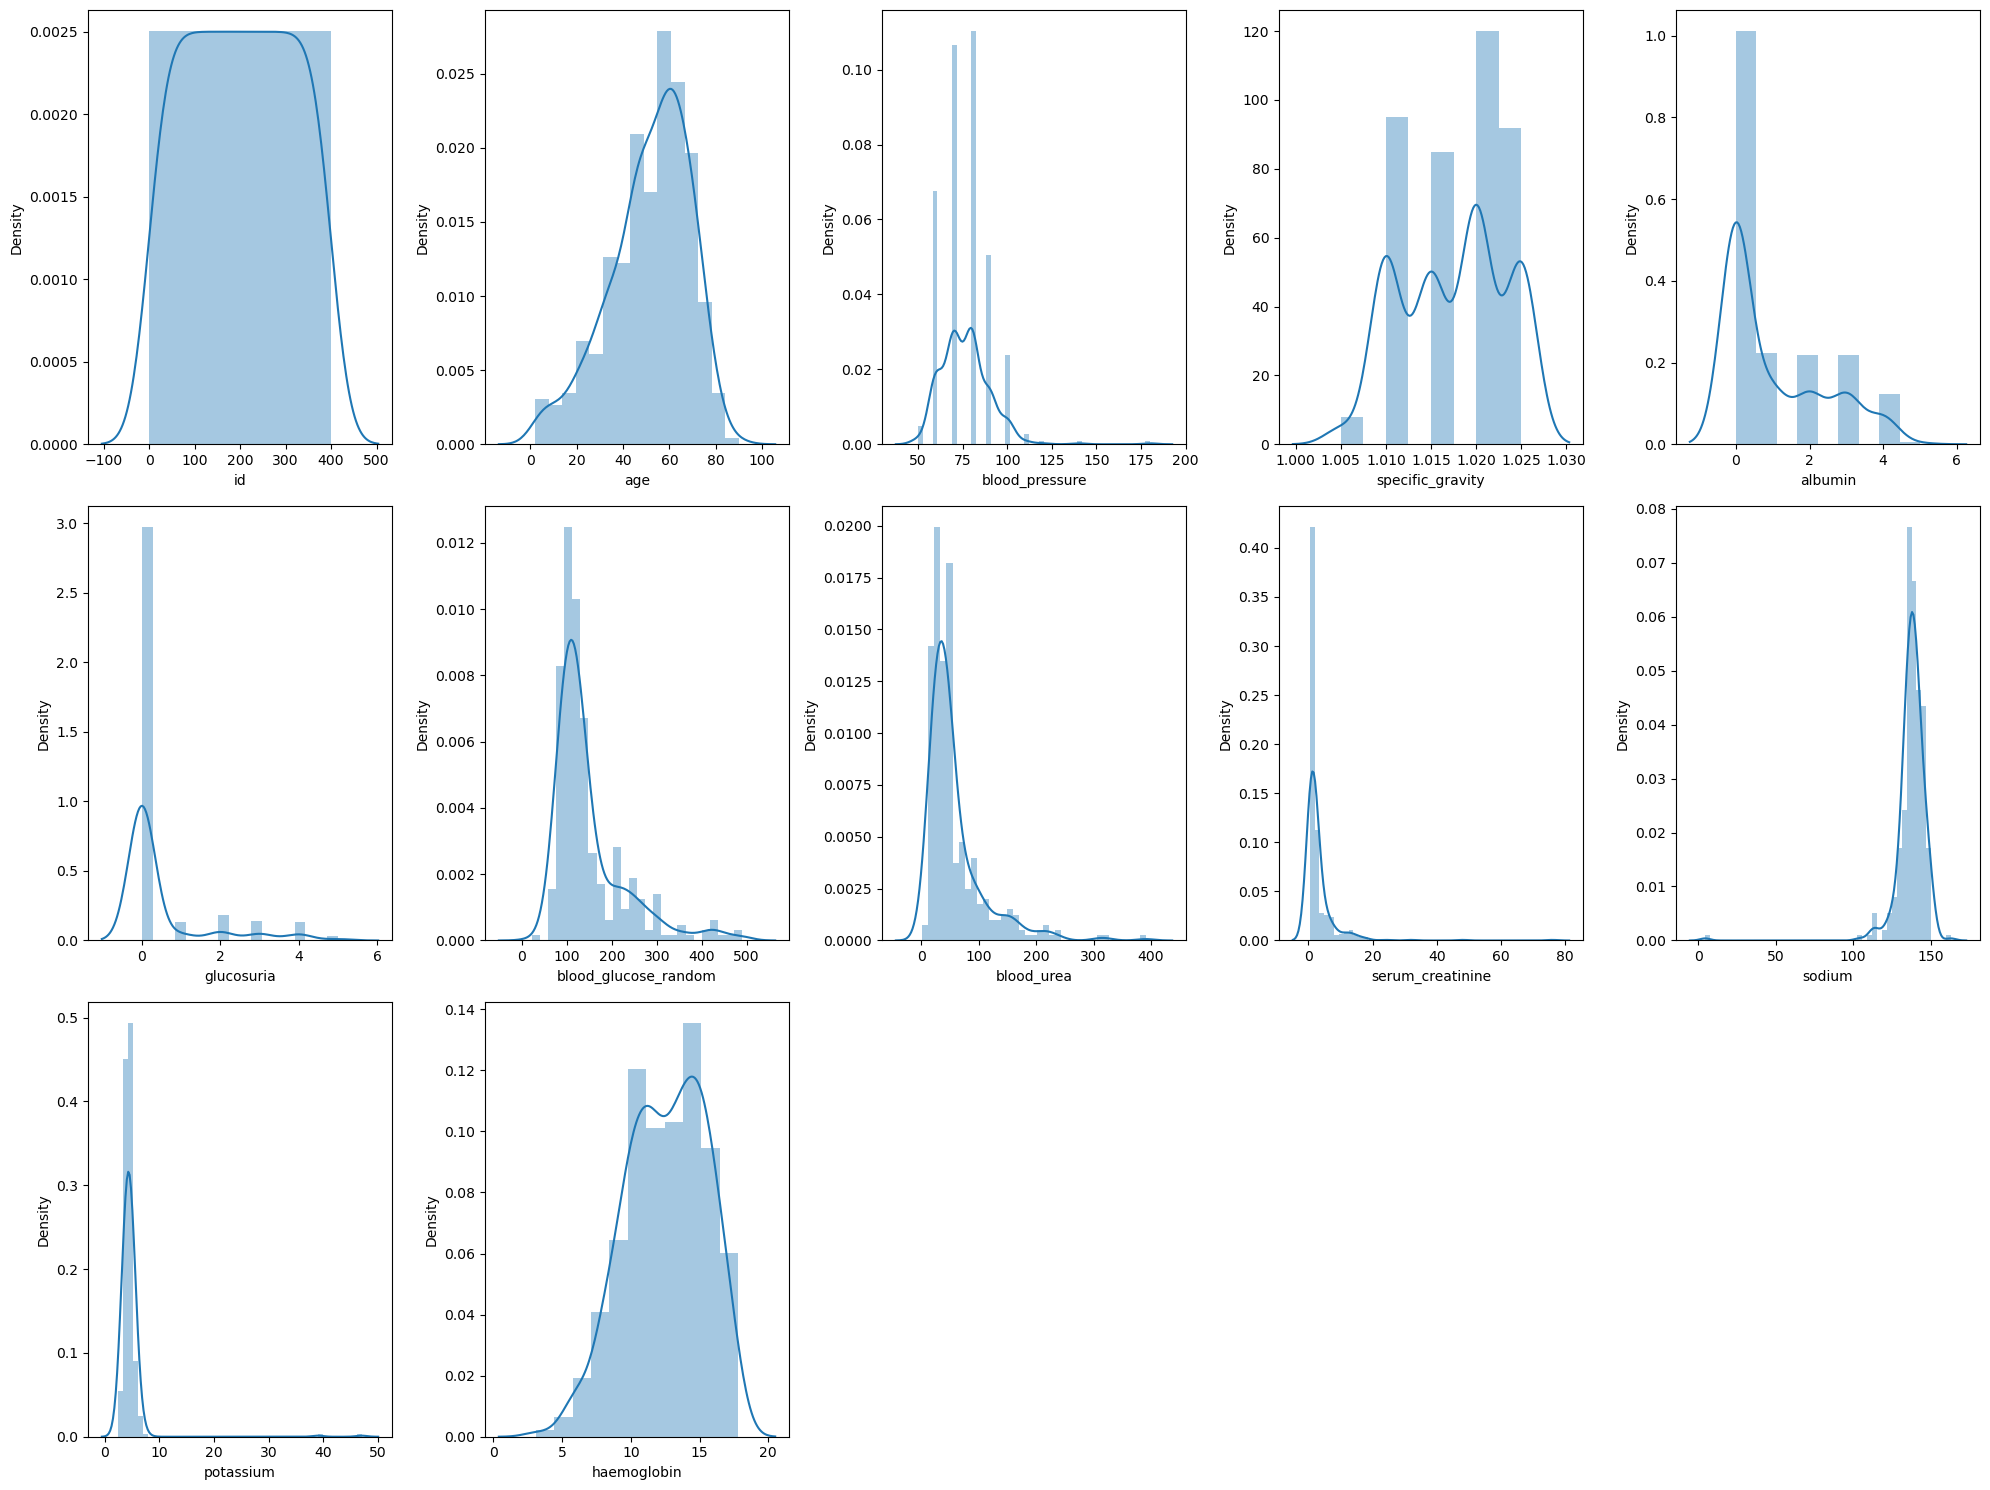

In [13]:


plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# distribution of Numerical data.

C:\Users\USER\AppData\Local\Temp\ipykernel_6032\3526016946.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_6032\3526016946.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wi

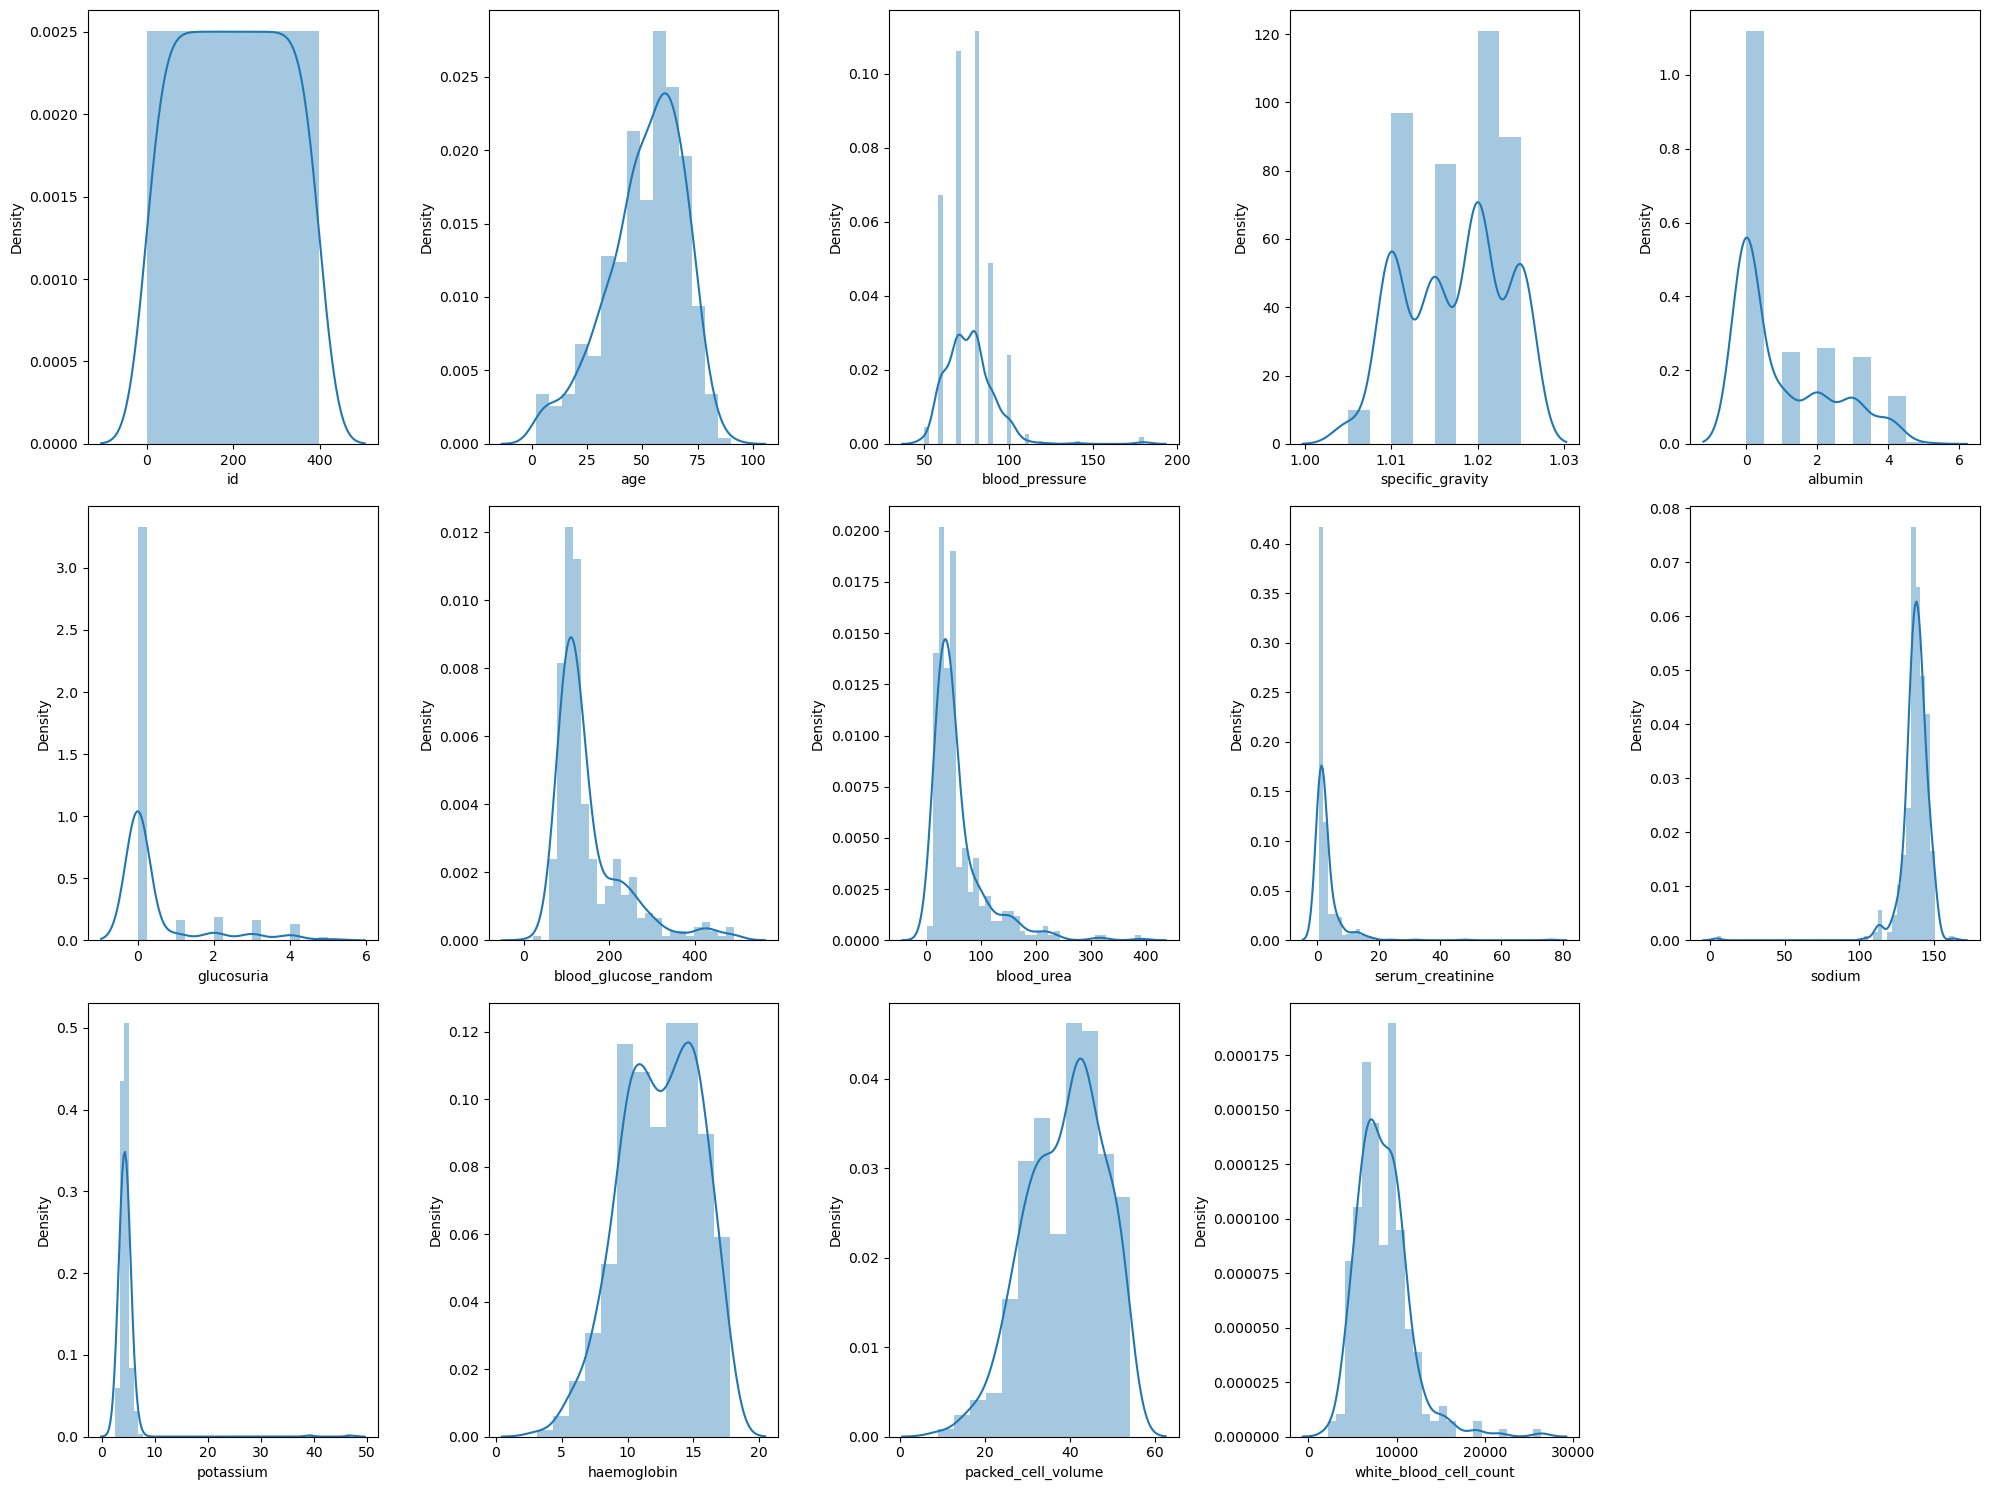

In [56]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# distribution of Categorical data

ValueError: could not convert string to float: 'normal'

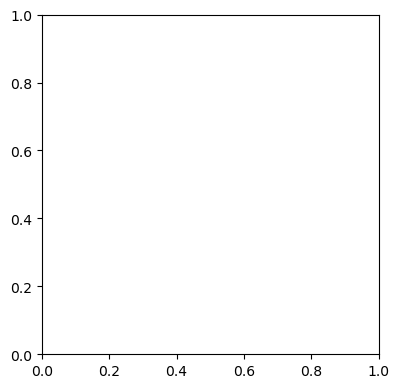

In [57]:
plt.figure(figsize = (20, 15))
plotnumber = 3

for col in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data[col], palette = 'rocket')
        plt.xlabel(col)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
for col in cat_cols:
    print(col, data[col].unique())


# Data pre_processing


In [58]:
data[cat_cols].isna().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            4
bacteria                   4
hypertension               2
diabetes_mellitus          2
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

In [59]:
data[num_cols].isnull().sum()

id                          0
age                         0
blood_pressure              0
specific_gravity            0
albumin                     0
glucosuria                  0
blood_glucose_random        0
blood_urea                  0
serum_creatinine            0
sodium                      0
potassium                   0
haemoglobin                 0
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
class                       0
dtype: int64

In [60]:

# 1. random sampling for higher null values 

def random_value_imputation(col):
    random_sample = data[col].dropna().sample(data[col].isna().sum())
    random_sample.index = data[data[col].isnull()].index
    data.loc[data[col].isnull(), col] = random_sample
    
# 2. # mean/mode sampling for lower null values
def impute_mode(col):
    mode = data[col].mode()[0]
    data[col] = data[col].fillna(mode)

In [61]:
for col in num_cols:
    random_value_imputation(col)

In [62]:
data[num_cols].isna().sum()
    

id                        0
age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
glucosuria                0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
class                     0
dtype: int64

In [46]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')


In [69]:
def impute_mode(col):
    mode = data[col].mode()[0]  # Select the first value from the mode Series
    data[col] = data[col].fillna(mode)

impute_mode('coronary_artery_disease')
impute_mode('appetite')
impute_mode('peda_edema')
impute_mode('aanemia')
impute_mode('pus_cell_clumps')
impute_mode('bacteria')
impute_mode('hypertension')
impute_mode('diabetes_mellitus')


In [70]:
data[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      400 non-null    float64
 2   blood_pressure           400 non-null    float64
 3   specific_gravity         400 non-null    float64
 4   albumin                  400 non-null    float64
 5   glucosuria               400 non-null    float64
 6   red_blood_cells          400 non-null    object 
 7   pus_cell                 400 non-null    object 
 8   pus_cell_clumps          400 non-null    object 
 9   bacteria                 400 non-null    object 
 10  blood_glucose_random     400 non-null    float64
 11  blood_urea               400 non-null    float64
 12  serum_creatinine         400 non-null    float64
 13  sodium                   400 non-null    float64
 14  potassium                4

# Feature Engeneering

 # 1.Feature encoding

In [73]:
for col in cat_cols:
    print(f"{col} has {data[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories



each categorical variable is now having only two options. 

In [74]:
le = LabelEncoder()

for col in data[cat_cols]:
   data[col] = le.fit_transform(data[col])

In [75]:

data.head()

,id,age,blood_pressure,specific_gravity,albumin,glucosuria,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,6.1,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [78]:
data.drop('id', axis = 1, inplace = True)

# Feature selection

In [81]:
data.corr()

,age,blood_pressure,specific_gravity,albumin,glucosuria,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
age,1.000000,0.096601,-0.186580,0.107490,0.197968,-0.019129,-0.128563,0.159086,0.044527,0.155154,...,-0.197449,0.051124,-0.193208,0.391890,0.367419,0.231699,0.165867,0.085515,0.045878,-0.213235
blood_pressure,0.096601,1.000000,-0.197106,0.163974,0.266383,-0.160767,-0.174618,0.049729,0.100076,0.193624,...,-0.223037,-0.003112,-0.197236,0.237363,0.236440,0.075394,0.157954,0.101228,0.177328,-0.286105
specific_gravity,-0.186580,-0.197106,1.000000,-0.406490,-0.310560,0.272296,0.300412,-0.263570,-0.200566,-0.346418,...,0.473113,-0.132934,0.325864,-0.339576,-0.392447,-0.098127,-0.234466,-0.248123,-0.209788,0.652916
albumin,0.107490,0.163974,-0.406490,1.000000,0.242897,-0.282295,-0.465819,0.381999,0.351137,0.324549,...,-0.434267,0.148452,-0.310081,0.475572,0.341604,0.219144,0.292855,0.430440,0.274606,-0.558528
glucosuria,0.197968,0.266383,-0.310560,0.242897,1.000000,-0.104980,-0.187243,0.156154,0.110973,0.606195,...,-0.179890,0.131797,-0.119451,0.269079,0.448804,0.217240,0.078183,0.101750,0.083726,-0.309377
red_blood_cells,-0.019129,-0.160767,0.272296,-0.282295,-0.104980,1.000000,0.249054,-0.049300,-0.169915,-0.112634,...,0.224811,-0.016712,0.172845,-0.149988,-0.136357,-0.111284,-0.160887,-0.150632,-0.091538,0.339246
pus_cell,-0.128563,-0.174618,0.300412,-0.465819,-0.187243,0.249054,1.000000,-0.467758,-0.295426,-0.275558,...,0.361928,-0.103638,0.297986,-0.283650,-0.227135,-0.184375,-0.238591,-0.327366,-0.233241,0.361513
pus_cell_clumps,0.159086,0.049729,-0.263570,0.381999,0.156154,-0.049300,-0.467758,1.000000,0.275082,0.197280,...,-0.274670,0.164240,-0.202608,0.195623,0.165236,0.188029,0.189688,0.104356,0.175861,-0.265313
bacteria,0.044527,0.100076,-0.200566,0.351137,0.110973,-0.169915,-0.295426,0.275082,1.000000,0.106478,...,-0.177612,0.044335,-0.143366,0.089046,0.080070,0.162395,0.149126,0.134732,0.052208,-0.186871
blood_glucose_random,0.155154,0.193624,-0.346418,0.324549,0.606195,-0.112634,-0.275558,0.197280,0.106478,1.000000,...,-0.219717,0.147504,-0.160692,0.341705,0.461761,0.194826,0.167376,0.139411,0.112217,-0.404978


# Modelling


In [112]:
# Defining dependant and independant variable
x_var = [var for var in data.columns if var != 'class'] 
y_var = data['class']
x = data[x_var]
y = y_var

In [83]:

corr_matrix = data.corr()

# Sort correlation values with respect to 'class'
class_correlation = corr_matrix['class'].sort_values(ascending=False)


'''# Plot sorted correlation values
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix.loc[class_correlation.index, class_correlation.index], 
            annot=True, linewidths=2, linecolor='lightgrey')
plt.show()'''


"# Plot sorted correlation values\nplt.figure(figsize=(15, 8))\nsns.heatmap(corr_matrix.loc[class_correlation.index, class_correlation.index], \n            annot=True, linewidths=2, linecolor='lightgrey')\nplt.show()"

In [1]:

# Initialize lists to store correlation coefficients and p-values
corr_values = []
p_values = []

# Calculate correlation coefficients and p-values
for col in class_correlation.index:
    corr, p_value = pearsonr(data[col], data['class'])
    corr_values.append(corr)
    p_values.append(p_value)

# Convert lists to DataFrame for visualization
corr_df = pd.DataFrame({'Correlation': corr_values, 'P-Value': p_values}, index=class_correlation.index)

# Plot sorted correlation values
#plt.figure(figsize=(10, 5))
#sns.heatmap(corr_df, annot=True, fmt='.3f', linewidths=2)
#plt.show()


NameError: name 'class_correlation' is not defined

In [103]:
selected_columns = corr_df[corr_df['P-Value'] < 0.05].index
# Select only the columns with p-value > 0.05 
selected_features = data[selected_columns]
selected_features.columns

Index(['class', 'haemoglobin', 'specific_gravity', 'packed_cell_volume',
       'red_blood_cell_count', 'pus_cell', 'red_blood_cells', 'sodium',
       'white_blood_cell_count', 'bacteria', 'age', 'coronary_artery_disease',
       'pus_cell_clumps', 'blood_pressure', 'serum_creatinine', 'glucosuria',
       'aanemia', 'blood_urea', 'peda_edema', 'appetite',
       'blood_glucose_random', 'albumin', 'diabetes_mellitus', 'hypertension'],
      dtype='object')

Other features are statistically signifiacnt to have correlation with the independant varibale except only ['potassium']

In [113]:
# split train and test portion
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

# RandomForest Classifier.

In [127]:

# Initialize the Random Forest classifier with default parameters
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(x_train, y_train)
y_predict = rf_classifier.predict(x_test)    # Make predictions using the trained model

rf_accuracy_test = accuracy_score(y_test, rf_classifier.predict(x_test))
rf_accuracy_train = accuracy_score(y_train, rf_classifier.predict(x_train))
print (f"Training accuracy is {rf_accuracy_train}")
print(f"Testing score: on unseen Data is : {rf_accuracy_test}")



Training accuracy is 1.0
Testing score: on unseen Data is : 0.9666666666666667


In [129]:
print(f'Confusion matrix:n\ {confusion_matrix(y_test, rf_classifier.predict(x_test))}')

Confusion matrix:n\ [[72  0]
 [ 4 44]]


# XGBOOST

In [138]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(x_train, y_train)
y_predict =  xgb.predict(x_test)
xgb_accuracy = accuracy_score(y_test,y_predict)
print(f"xgboost accuracy is : {xgb_accuracy}")

xgboost accuracy is : 0.9666666666666667


In [137]:
xgb_accuracy == rf_accuracy_test

True

In [139]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(x_test))}\n")

Confusion Matrix :- 
[[71  1]
 [ 3 45]]



# SVM

In [144]:
svm_classifier = SVC(kernel='linear')  
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9583333333333334


# Logistic Regression


In [149]:
logreg_classifier = LogisticRegression(max_iter = 1000)
logreg_classifier.fit(x_train, y_train)
y_pred = logreg_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9833333333333333
